### original & veverse entries analysis

In [1]:
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import precision_score, accuracy_score,recall_score, f1_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, auc
import numpy as np
import pandas as pd

In [2]:
def softmax(vec):
    """Compute the softmax in a numerically stable way."""
    vec = vec - np.max(vec)  # softmax(x) = softmax(x+c)
    exp_x = np.exp(vec)
    softmax_x = exp_x / np.sum(exp_x)
    return softmax_x

#### original testset performance (final model)

ACC:  0.9846153846153847 Precision:  1.0 Recall:  0.9770114942528736 F1:  0.9883720930232558 AUC:  0.9995266272189349


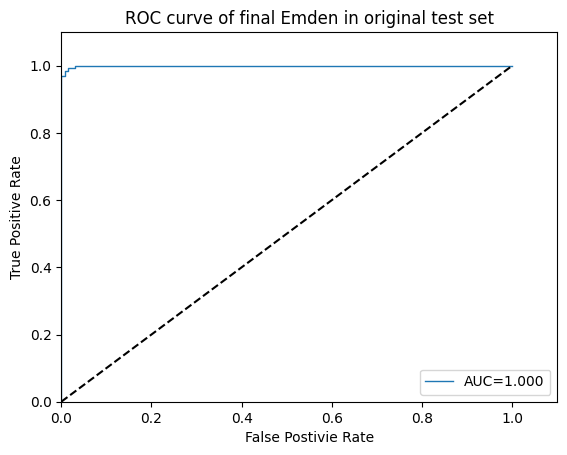

In [3]:
predpath = '../model/pred_results/ori/'

label = np.load(predpath + 'label.npy')
pred = np.load(predpath + 'pred.npy')
prob = np.load(predpath + 'pred_prob.npy')
raw = np.load(predpath + 'pred_raw.npy')

y_one_hot = to_categorical(label)
y_score_pro_list = []
for j in range(prob.shape[0]):
    y_score_pro_list.append([1-prob[j],prob[j]])
y_score_pro = np.array(y_score_pro_list)

acc = accuracy_score(label, pred)
precision = precision_score(label, pred)
recall = recall_score(label, pred)
f1 = f1_score(label, pred)
fpr, tpr, thresholds = roc_curve(y_one_hot.ravel(),y_score_pro.ravel())   
auc_value = auc(fpr, tpr)

plt.plot(fpr, tpr, linewidth = 1,label='AUC=%.3f' % auc(fpr, tpr))
plt.plot([0,1],[0,1], 'k--')

print('ACC: ', acc, 'Precision: ', precision, 'Recall: ', recall, 'F1: ', f1, 'AUC: ', auc_value)
plt.axis([0,1.1,0,1.1])
plt.xlabel('False Postivie Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('ROC curve of final Emden in original test set')
plt.savefig('images/roc-emden-ori.png',dpi=300)
plt.show()

#### reverse testset performance (final model)

ACC:  0.8307692307692308 Precision:  0.9113924050632911 Recall:  0.8275862068965517 F1:  0.8674698795180723 AUC:  0.9181065088757396


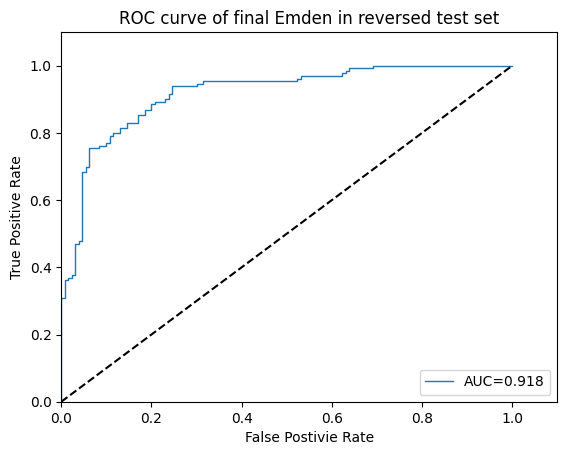

In [4]:
predpath = '../model/pred_results/rev/'

label = np.load(predpath + 'label.npy')
pred = np.load(predpath + 'pred.npy')
prob = np.load(predpath + 'pred_prob.npy')
raw = np.load(predpath + 'pred_raw.npy')

y_one_hot = to_categorical(label)
y_score_pro_list2 = []
for j in range(prob.shape[0]):
    y_score_pro_list2.append([1-prob[j],prob[j]])
y_score_pro2 = np.array(y_score_pro_list2)

acc = accuracy_score(label, pred)
precision = precision_score(label, pred)
recall = recall_score(label, pred)
f1 = f1_score(label, pred)
fpr, tpr, thresholds = roc_curve(y_one_hot.ravel(),y_score_pro2.ravel())   
auc_value = auc(fpr, tpr)

plt.plot(fpr, tpr, linewidth = 1,label='AUC=%.3f' % auc(fpr, tpr))
plt.plot([0,1],[0,1], 'k--')

print('ACC: ', acc, 'Precision: ', precision, 'Recall: ', recall, 'F1: ', f1, 'AUC: ', auc_value)
plt.axis([0,1.1,0,1.1])
plt.xlabel('False Postivie Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('ROC curve of final Emden in reversed test set')
plt.savefig('images/roc-emden-rev.png',dpi=300)
plt.show()

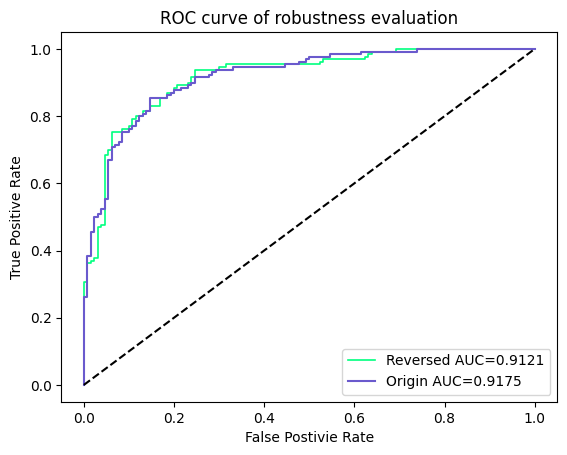

In [5]:
# merge ROC curve
fpr, tpr, thresholds = roc_curve(y_one_hot.ravel(),y_score_pro.ravel()) 
fpr2, tpr2, thresholds2 = roc_curve(y_one_hot.ravel(),y_score_pro2.ravel()) 
plt.plot(fpr2, tpr2, linewidth = 1.2,label='Reversed AUC=0.9121', color='#00FF7F')
plt.plot(fpr, tpr, linewidth = 1.5,label='Origin AUC=0.9175', color='#6A5ACD')
plt.xlabel('False Postivie Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.plot([0,1],[0,1], 'k--')
plt.title('ROC curve of robustness evaluation')
plt.savefig('images/robustness-evaluation.png',dpi=300)
plt.show()